# Problem 1. Linear function

In [148]:
import numpy as np
import matplotlib.pyplot as plt

x_ndarray = np.arange(-50, 50.1, 0.1)
y_ndarray = 0.5 * x_ndarray - 1.
print(x_ndarray.shape)


(1001,)


# Problem 2. Array combination

In [149]:
combine_x_y = np.concatenate((x_ndarray.reshape(1001,1) , y_ndarray.reshape(1001,1)) ,axis=1)
combine_x_y_res = combine_x_y.reshape(1001,2)
print(combine_x_y_res)

[[-50.   -26.  ]
 [-49.9  -25.95]
 [-49.8  -25.9 ]
 ...
 [ 49.8   23.9 ]
 [ 49.9   23.95]
 [ 50.    24.  ]]


# Problem 3. find the gradient

$$ gradient = \frac{\Delta x}{\Delta y}$$

In [150]:
diff_x=[]
diff_y=[]
for i in range(100):
    diff_x.append(x_ndarray[i]- x_ndarray[i-1])
    diff_y.append(y_ndarray[i]- y_ndarray[i-1])
#print(diff_y)
delta_x_y = combine_x_y_res[1:] - combine_x_y_res[:-1]
#print(delta_x_y[:,[1]])
gradient=delta_x_y[:,[0]]/delta_x_y[:,[1]]
print(gradient.shape)

(1000, 1)


# Problem 4. Draw graph

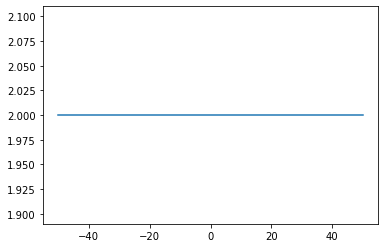

In [151]:
plt.plot(x_ndarray[:-1],gradient)

# Problem 5. functionalization

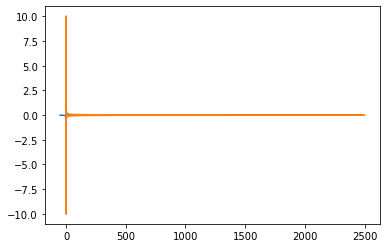

In [155]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    Calculate the slope using the amount of change.

    Parameters
    ----------------
    function : function
    The function you want, the one that returns the ndarray of y when you put the ndarray of x.
    x_range: tuple
    Specify the range in the same way as the argument of np.arange().

    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
    A combination of x and y. n depends on x_range。
    gradient : ndarray, shape(n-1,)
    Function gradient. One less element to make the difference
    """
    ndarray_x = np.arange(*x_range)
    ndarray_y = function(ndarray_x)
    ndarray_x_y = np.concatenate((ndarray_x.reshape(1001,1) , ndarray_y.reshape(1001,1)) ,axis=1).reshape(1001,2)
    array_xy = ndarray_x_y
    d_x_y = ndarray_x_y[1:] - ndarray_x_y[:-1]
    gradient=d_x_y[:,[0]]/d_x_y[:,[1]]
    pass
    return array_xy, gradient

def function1(array_x):
    array_y=array_x**2
    pass
    return array_y

def function2(array_x):
    array_y=(2*array_x**2) + 2**array_x
    pass
    return array_y

def function3(array_x):
    array_y=np.sin(array_x ** 0.5)
    pass
    return array_y

array_xy, gradient = compute_gradient(function1)
plt.plot(array_xy[:-1],gradient)


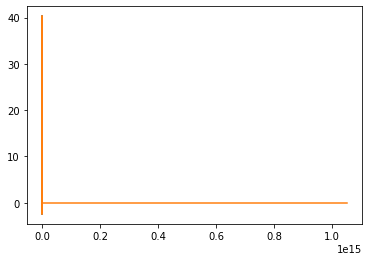

In [156]:
array_xy, gradient = compute_gradient(function2)
plt.plot(array_xy[:-1],gradient)

<ipython-input-155-1cc40d3f0c7e>:39: RuntimeWarning: invalid value encountered in sqrt
  array_y=np.sin(array_x ** 0.5)


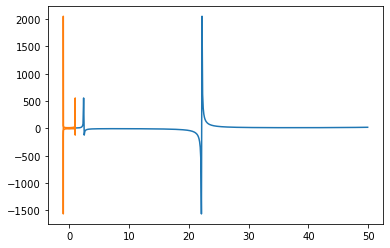

In [157]:
array_xy, gradient = compute_gradient(function3)
plt.plot(array_xy[:-1],gradient)

# Problem 6. find the minimum value

In [146]:
print("minimum value of the gradient is {}".format(gradient.min()))
print("index of the minimum value is {}".format(gradient.argmin()))

minimum value of the gradient is -10.000000000141966
index of the minimum value is 499
